Ex4.3

In [323]:
# Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [343]:
dataset = pd.read_csv('ex4_3_train.csv')
dataset2 = pd.read_csv('ex4_3_val.csv')
dataset3 = pd.read_csv('ex4_3_test.csv')
# spilt(x,y)
x_train = dataset.iloc[:,[0]].values 
y_train =  dataset.iloc[:,[1]].values
x_val = dataset2.iloc[:,[0]].values 
x_test = dataset3.iloc[:,[0]].values 
y_val =  dataset2.iloc[:,[1]].values
y_test =  dataset3.iloc[:,[1]].values
x = x_train
x

array([[0.67617],
       [0.1308 ],
       [0.89631],
       [0.84971],
       [0.08061],
       [0.16107],
       [0.20518],
       [0.24813],
       [0.03688],
       [0.79355],
       [0.59199],
       [0.66897],
       [0.72757],
       [0.13881],
       [0.09378],
       [0.28845],
       [0.5713 ],
       [0.78853],
       [0.43217],
       [0.96281],
       [0.25144],
       [0.65929],
       [0.2101 ],
       [0.74713],
       [0.16187],
       [0.70124],
       [0.64351],
       [0.04   ],
       [0.48249],
       [0.13987],
       [0.20824],
       [0.96712],
       [0.77346],
       [0.20269],
       [0.02245],
       [0.64714],
       [0.41949],
       [0.36231],
       [0.72005],
       [0.60114],
       [0.89005],
       [0.0108 ],
       [0.77568],
       [0.91047],
       [0.86028],
       [0.9105 ],
       [0.64219],
       [0.35195],
       [0.62083],
       [0.38099],
       [0.9922 ],
       [0.12921],
       [0.19444],
       [0.84807],
       [0.89209],
       [0.

plot

In [344]:
#  Plotting Functions

def evaluate_fits(order_list, mse_list):

  fig, ax = plt.subplots()
  ax.bar(order_list, mse_list)
  ax.set(title='Comparing Polynomial Fits', xlabel='Polynomial order', ylabel='MSE')

def plot_fitted_polynomials(x, y, theta_hat):
  x_grid = np.linspace(x.min() - .5, x.max() + .5)

  plt.figure()

  for order in range(0, max_order + 1):
    X_design = make_design_matrix(x_grid, order)
    plt.plot(x_grid, X_design @ theta_hat[order]);

  plt.ylabel('y')
  plt.xlabel('x')
  plt.plot(x, y, 'C0.');
  plt.legend([f'order {o}' for o in range(max_order + 1)], loc=1)
  plt.title('polynomial fits')
  plt.show()

1.make a design matrix
![1](./1.png)

In [345]:

def make_design_matrix(x, order):
 # Atleast shape (n x 1) can matrix work
  if x.ndim == 1:
    x = x[:, None]

  #if x has more than one feature
  # x^0 here
  design_matrix = np.ones((x.shape[0], 1))

  # Loop
  for degree in range(1, order + 1):
      design_matrix = np.hstack((design_matrix, x**degree))

  return design_matrix




Bsp

In [346]:
order = 20
X_design = make_design_matrix(x, order)

print(X_design[0:20, 0:20])

[[1.00000000e+00 6.76170000e-01 4.57205869e-01 3.09148892e-01
  2.09037207e-01 1.41344688e-01 9.55730377e-02 6.46236209e-02
  4.36965537e-02 2.95462987e-02 1.99783208e-02 1.35087412e-02
  9.13420553e-03 6.17627575e-03 4.17621237e-03 2.82382952e-03
  1.90938881e-03 1.29107143e-03 8.72983769e-04 5.90285435e-04]
 [1.00000000e+00 1.30800000e-01 1.71086400e-02 2.23781011e-03
  2.92705563e-04 3.82858876e-05 5.00779410e-06 6.55019468e-07
  8.56765464e-08 1.12064923e-08 1.46580919e-09 1.91727842e-10
  2.50780017e-11 3.28020263e-12 4.29050503e-13 5.61198058e-14
  7.34047060e-15 9.60133555e-16 1.25585469e-16 1.64265793e-17]
 [1.00000000e+00 8.96310000e-01 8.03371616e-01 7.20070013e-01
  6.45405954e-01 5.78483810e-01 5.18500824e-01 4.64737474e-01
  4.16548845e-01 3.73356895e-01 3.34643519e-01 2.99944332e-01
  2.68843104e-01 2.40966763e-01 2.15980919e-01 1.93585858e-01
  1.73512940e-01 1.55521383e-01 1.39395371e-01 1.24941465e-01]
 [1.00000000e+00 8.49710000e-01 7.22007084e-01 6.13496639e-01
  5.2

This is for least squares

In [347]:

X = x
def ordinary_least_squares(X, y):

 # Compute theta_hat using OLS
  theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

  return theta_hat


theta_hat = ordinary_least_squares(X, y)
print(theta_hat)

[[1.61851916]]


2.MLE estimator

In [348]:

def solve_poly_reg(x, y, max_order):

  # Create a dictionary with polynomial order as keys,
  # and np array of theta_hat (weights) as the values
  theta_hats = {}

  # Loop over polynomial orders from 0 through max_order
  for order in range(max_order + 1):

    # Create design matrix
    X_design = make_design_matrix(x, order)

    # Fit polynomial model
    this_theta = ordinary_least_squares(X_design, y)

    theta_hats[order] = this_theta

  return theta_hats





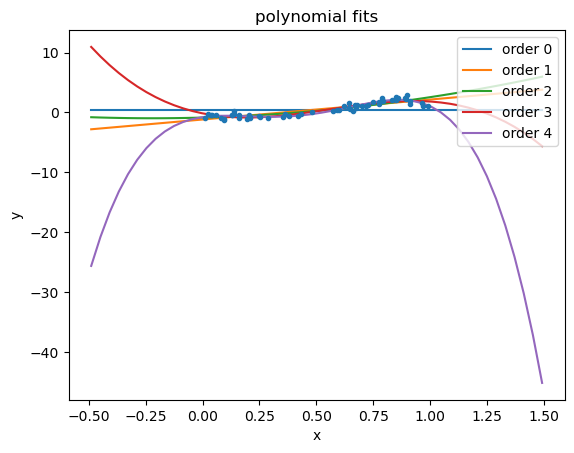

In [349]:
max_order = 4
theta_hats = solve_poly_reg(x, y, max_order)

# Visualize
plot_fitted_polynomials(x, y, theta_hats)

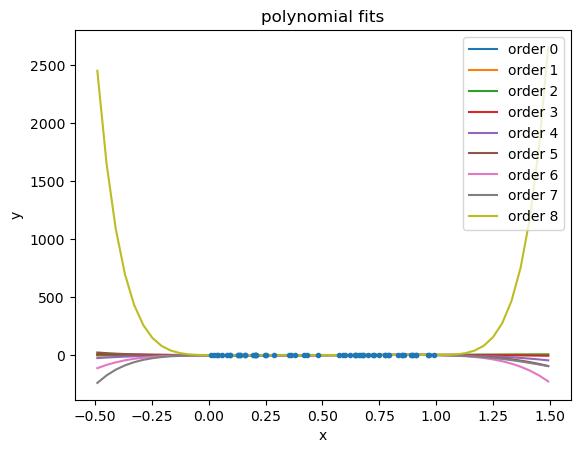

In [350]:
max_order = 8
theta_hats = solve_poly_reg(x, y, max_order)

# Visualize
plot_fitted_polynomials(x, y, theta_hats)

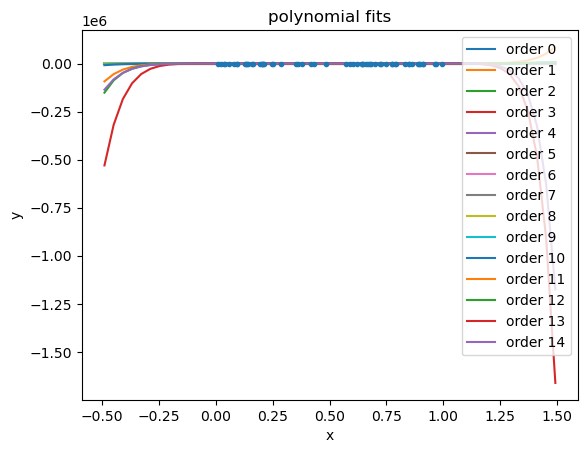

In [351]:
max_order = 14
theta_hats = solve_poly_reg(x, y, max_order)

# Visualize
plot_fitted_polynomials(x, y, theta_hats)

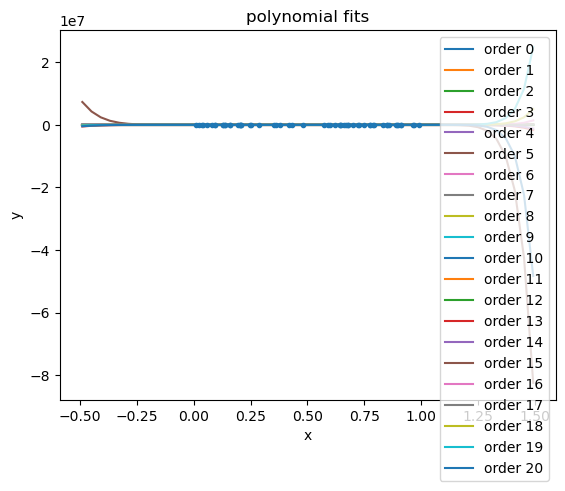

In [352]:
max_order = 20
theta_hats = solve_poly_reg(x, y, max_order)

# Visualize
plot_fitted_polynomials(x, y, theta_hats)

3.MSE

In [353]:
max_order = 12

In [354]:

mse_list = []
order_list = list(range(max_order + 1))

for order in order_list:

  X_design = make_design_matrix(x, order)

  # Get prediction for the polynomial regression model of this order
  y_hat = X_design @ theta_hats[order]

  # Compute the residuals
  residuals = y - y_hat

  # Compute the MSE
  mse = np.mean(residuals ** 2)

  mse_list.append(mse)




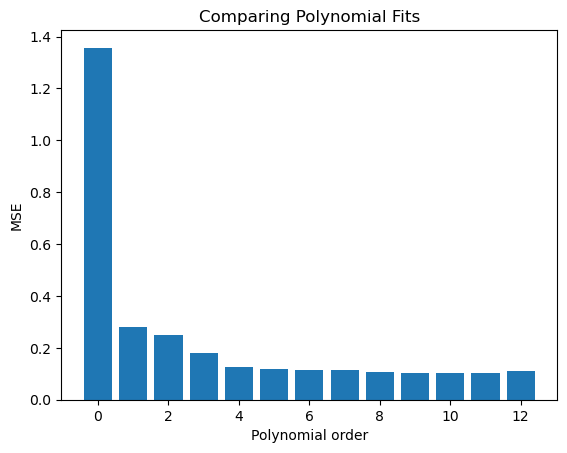

In [355]:
# Visualize MSE of fits
evaluate_fits(order_list, mse_list)

4. Sei find the best order 10

In [356]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

lin.fit(X, y)

LinearRegression()

In [357]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 1) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y)

LinearRegression()

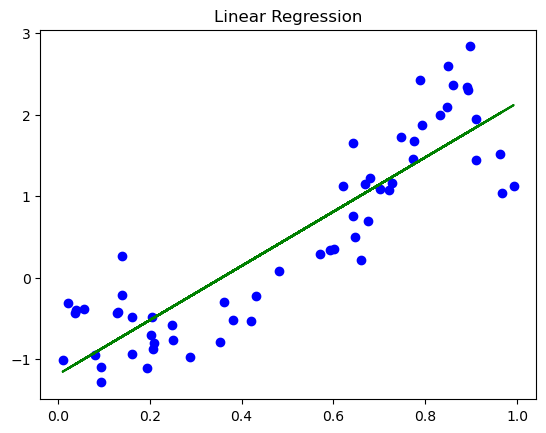

In [358]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'green') 
plt.title('Linear Regression')  
plt.show()

5.Plot the training and test errors against the degree of the polynomial. A paper-pencil plot on squared paper is fine. What do you observe?

You can see whether the model is overfitted by looking at the relationship between the loss values of the training and validation sets with the change of epoch, and if it is, you can stop the training in time and then adjust the model structure and hyperparameters according to the situation, which saves time greatly.

The results obtained after the test set are more accurate

6.Implement the estimator wRIDGE.


In [359]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


def ridge_demo():
     #4 岭
    estimator = Ridge(alpha=1) # 1
    # estimator = RidgeCV(alphas=(0.1, 1, 10))  # 2
    estimator.fit(x_train, y_train)

    y_predict = estimator.predict(x_test)
    print("predict为:\n", y_predict)
    print("coef:\n", estimator.coef_)
    print("intercept:\n", estimator.intercept_)

    # .2 
    # 均方误差
    error = mean_squared_error(y_test, y_predict)
    print("error:\n", error)


if __name__ == '__main__':
    ridge_demo()

predict为:
 [[ 0.08611446]
 [-0.61103771]
 [ 1.01428889]
 [-0.67416242]
 [-0.38271066]
 [-0.28471841]
 [ 0.40139757]
 [ 1.08890372]
 [ 1.13026814]
 [ 1.11656511]
 [-0.30415231]
 [ 0.99474151]
 [ 1.06470355]
 [ 1.36750358]
 [ 0.64680376]
 [-0.58468137]
 [ 0.22297451]
 [ 1.4754823 ]
 [ 0.41969665]
 [-0.59106477]
 [ 1.57165883]
 [ 0.77651441]
 [ 0.91873652]
 [-0.83454175]
 [ 0.03955821]
 [ 0.22195317]
 [ 0.9643849 ]
 [ 0.66042168]
 [ 1.79422664]]
coef:
 [[2.83706576]]
intercept:
 [-0.94098846]
error:
 0.23403165723376682


7.Find a good combination of d and  that gives you a small validation error. Is the
test error smaller than the test error of the optimal solution from (d)?

I think they are both similar in this question

Because there are no errors or omissions in the data there is no need to add